# Pymaceuticals Inc.
---



In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [110]:
# Study data files
mouse_path = "data/Mouse_metadata.csv"
study_path = "data/Study_results.csv"

In [111]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_path)
study_results = pd.read_csv(study_path)

In [112]:
#using .info to make sure everthing looks okay before merging the data frames
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [113]:
# using .info again to check the dtypes and null values
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [114]:
# Combine the data into a single DataFrame
mouse_complete = pd.merge(study_results,mouse_metadata, how="left", on="Mouse ID")

In [115]:
# Display the data table for preview
#mouse_complete.head()
mouse_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [116]:
# Checking the number of mice.
mouse_complete["Mouse ID"].nunique()

249

In [117]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_complete.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending = False).head(15)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
          35           1
q633      15           1
          5            1
          10           1
q610      10           1
dtype: int64

In [118]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = mouse_complete["Mouse ID"] == "g989"
mouse_complete.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [119]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = mouse_complete["Mouse ID"] != "g989"
clean_mouse_data = mouse_complete.loc[mask].reset_index(drop = True)
#using .info to make sure that it dropped the bad mouse data
clean_mouse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [120]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data["Mouse ID"].nunique()

248

In [121]:
#looking at the .head to make sure everything looks good still
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_variance = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_stand_dev = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

tumor_data = {
    "Tumor Average": tumor_mean,
    "Tumor Median": tumor_median,
    "Tumor Variance": tumor_variance,
    "Tumor Standard Deviation": tumor_stand_dev,
    "Tumor SEM": tumor_sem
}

tumor_leaderboard = pd.DataFrame(tumor_data).reset_index()
tumor_leaderboard

,Drug Regimen,Tumor Average,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [123]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cols_agg = {
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
}

data_tumor_leaderboard = clean_mouse_data.groupby(["Drug Regimen"]).agg(cols_agg).reset_index()
data_tumor_leaderboard

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

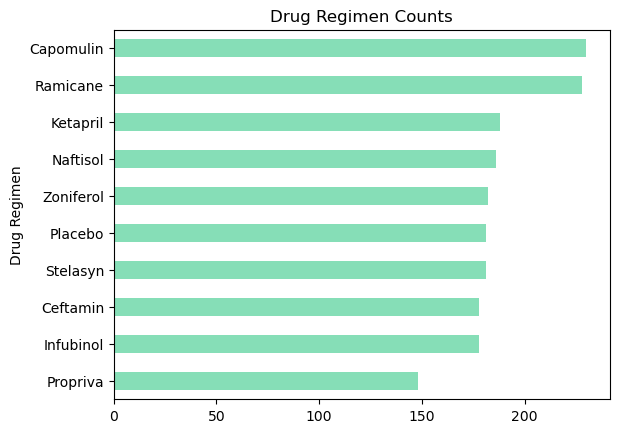

In [124]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#made the graph horizontal to show the data in a more readable way
clean_mouse_data["Drug Regimen"].value_counts().sort_values().plot(kind="barh", title="Drug Regimen Counts", color="#86DEB7")
plt.show()

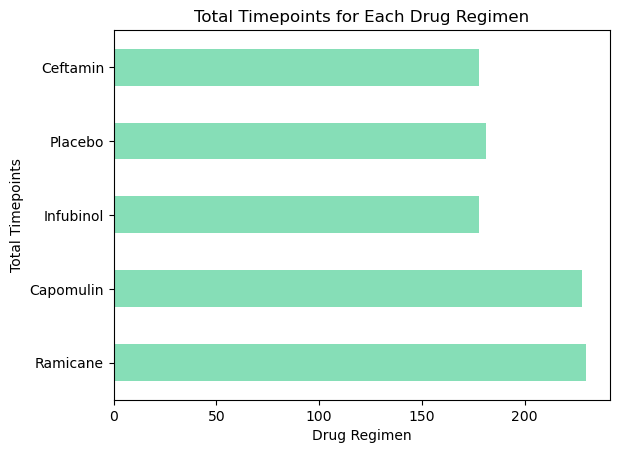

In [125]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_drug_data = {'Drug Regimen': ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin'],
        'Total Timepoints': [230, 228, 178, 181, 178]}

mouse_drugs = pd.DataFrame(mouse_drug_data)

# Create a bar plot using Pandas
mouse_drugs.plot(x='Drug Regimen', y='Total Timepoints', kind='barh', color='#86DEB7', legend=None)
plt.title('Total Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
#plt.xticks(rotation=45)
plt.show()

In [126]:
#finding the number of mice for the pie charts
clean_mouse_data["Sex"].value_counts()

Sex
Male      958
Female    922
Name: count, dtype: int64

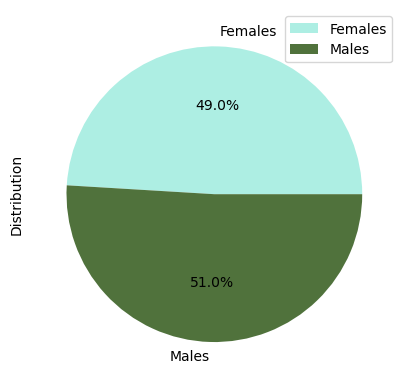

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#making the lists for the pie chart
mouse_pie = {
    "Distribution": [922, 958],
    "labels": ["Females", "Males"]}
mouse_pie_data = pd.DataFrame(mouse_pie)

colors = ["#ADEEE3","#50723C"]

mouse_pie_data.plot.pie(y = "Distribution", labels = mouse_pie_data["labels"], autopct='%1.1f%%', legend=True, colors = colors)
  
plt.show()

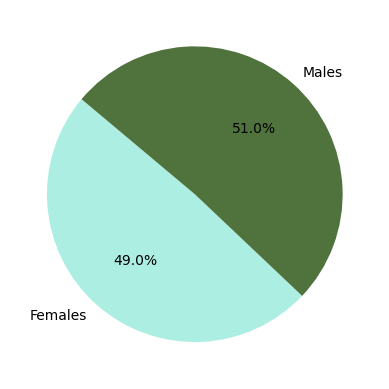

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Females", "Males"]
sizes = [922, 958]
colors = ["#ADEEE3", "#50723C"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [129]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_mouse_data.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(clean_mouse_data, on=['Mouse ID', 'Timepoint'], how='left')
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [130]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    end_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    end_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(end_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = end_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = end_tumor_vol.loc[(end_tumor_vol < lower_bound) | (end_tumor_vol > upper_bound)]
    print(f'({drug} potential outliers: {outliers})')

(Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64)
(Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))


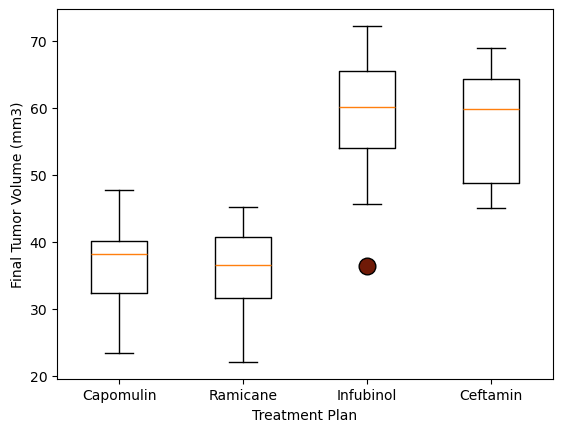

In [131]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_out = dict(markerfacecolor='#6F1A07',markersize=12)
plt.boxplot(tumor_vol_data, labels = treatments, flierprops=red_out)
plt.xlabel("Treatment Plan")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

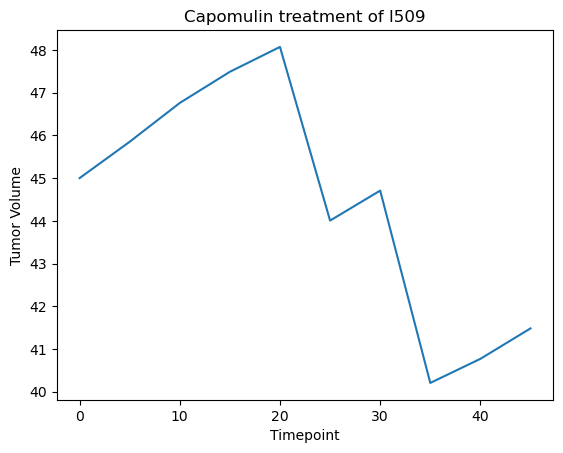

In [132]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin"]
mouse_data = capomulin_table.loc[capomulin_table["Mouse ID"] == 'l509']

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Capomulin treatment of l509')
plt.show()

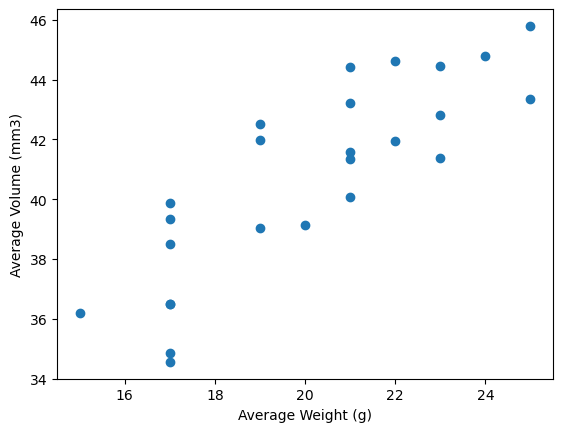

In [133]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Volume (mm3)')
plt.show()

## Correlation and Regression

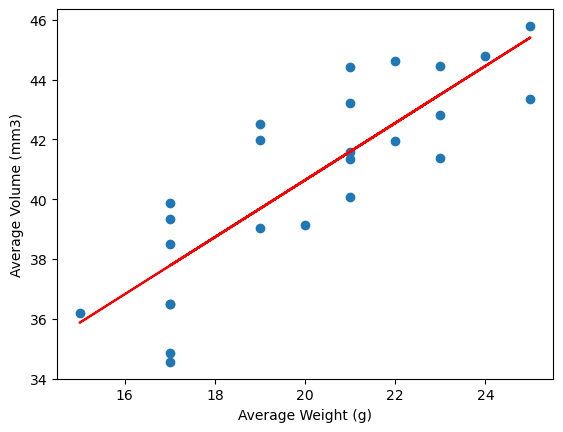

In [134]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_table = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

slope, intercept, r_value, p_value, std_err = linregress(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
regression_line = slope * capomulin_average['Weight (g)'] + intercept

plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'], regression_line, color='red')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Volume (mm3)')
plt.show()